# Homework 4: Modeling Text Data

### Team Member 1:
* UNI:  pw2435
* Name: Pingyuan Wang

### Team Member 2:
* UNI:  cz2431
* Name: Chenchao Zang


You can find the data here: https://data.boston.gov/dataset/vision-zero-entry

In [2]:
# Load the library
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np

# Task1 - Data Cleaning  [10 points]

Load the data, visualize the class distribution. Clean up the target labels. Some categories have been arbitrarily split and need to be consolidated. 

In [3]:
# Add your code for task 1 here. You may use multiple cells. 
data = pd.read_csv("../homework-iv-zangcc0474/Vision_Zero_Entry.csv")

In [4]:
data['REQUESTTYPE'].unique().shape

(28,)

In [5]:
data.REQUESTTYPE.unique()

array(["bike facilities don't exist or need improvement",
       'the wait for the "Walk" signal is too long',
       'people cross away from the crosswalks', 'people speed',
       "people don't yield while turning",
       "it's too far / too many lanes to cross",
       'people run red lights / stop signs',
       'people double park their vehicles',
       "people don't yield while going straight",
       'of something that is not listed here',
       'it’s hard to see / low visibility',
       "sidewalks/ramps don't exist or need improvement",
       'the roadway surface needs improvement',
       'the roadway surface needs maintenance',
       'people have to cross too many lanes / too far',
       'there are no bike facilities or they need maintenance',
       'there are no sidewalks or they need maintenance',
       'people are not given enough time to cross the street',
       'it’s hard for people to see each other',
       'people have to wait too long for the "Walk" signal'

In [6]:
# Manually replace some unorganized label
data[data['REQUESTTYPE']=='" src="images/10 - Hard to see.png"></span>&nbsp;it’s hard to see / low visibility'] = 'it’s hard to see / low visibility'
data[data['REQUESTTYPE']=='" src="images/02 - Wait is too long.png"></span>&nbsp;the wait for the "Walk" signal is too long'] = 'the wait for the "Walk" signal is too long'
data[data['REQUESTTYPE']=='" src="images/14 - Other issue.png"></span>&nbsp;of something that is not listed here']= 'of something that is not listed here'
data[data['REQUESTTYPE']=='" src="images/01 - Not enough time to cross.png"></span>&nbsp;there\'s not enough time to cross the street'] = "there's not enough time to cross the street"
data[data['REQUESTTYPE']=='" src="images/12 - Bike facility issue.png"></span>&nbsp;the roadway surface needs improvement'] = 'the roadway surface needs improvement'
data[data['REQUESTTYPE']=='" src="images/11 - Sidewalk issue.png"></span>&nbsp;sidewalks/ramps don\'t exist or need improvement'] = "sidewalks/ramps don't exist or need improvement"
data[data['REQUESTTYPE']=='" src="images/06 - Speeding.png"></span>&nbsp;people speed'] = 'people speed'

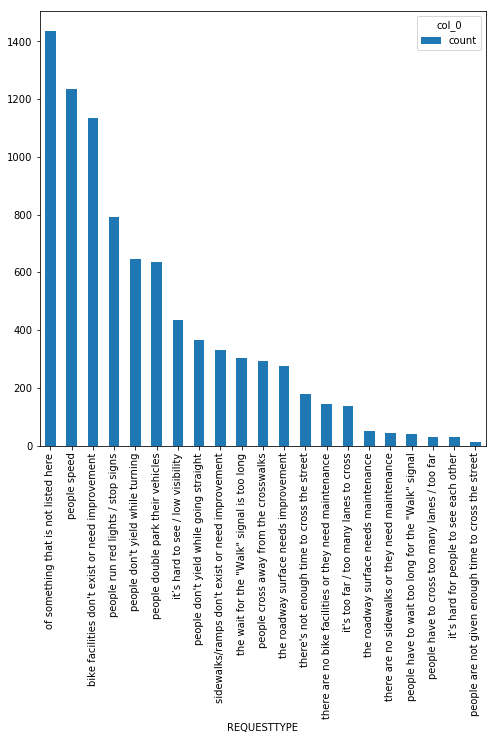

In [7]:
label_type_table = pd.crosstab(index = data['REQUESTTYPE'], columns="count")
label_type_table = label_type_table.sort_values(by = 'count', ascending = False)
label_type_table.plot(kind="bar",figsize=(8,8))

In [8]:
data['REQUESTTYPE'].unique().shape

(21,)

In [9]:
# Merge some labels manually
data[data['REQUESTTYPE']=='people have to wait too long for the "Walk" signal'] = 'the wait for the "Walk" signal is too long'
data[data['REQUESTTYPE']=='people are not given enough time to cross the street'] = "there's not enough time to cross the street"
data[data['REQUESTTYPE']=='the roadway surface needs maintenance'] = 'the roadway surface needs improvement'
data[data['REQUESTTYPE']=='there are no sidewalks or they need maintenance'] = "sidewalks/ramps don't exist or need improvement"
data[data['REQUESTTYPE']=='there are no bike facilities or they need maintenance'] = "bike facilities don't exist or need improvement"
data[data['REQUESTTYPE']=='people have to cross too many lanes / too far'] = "it's too far / too many lanes to cross"
data[data['REQUESTTYPE']=="it’s hard for people to see each other"] = "it’s hard to see / low visibility"

In [10]:
data['REQUESTTYPE'].unique()

array(["bike facilities don't exist or need improvement",
       'the wait for the "Walk" signal is too long',
       'people cross away from the crosswalks', 'people speed',
       "people don't yield while turning",
       "it's too far / too many lanes to cross",
       'people run red lights / stop signs',
       'people double park their vehicles',
       "people don't yield while going straight",
       'of something that is not listed here',
       'it’s hard to see / low visibility',
       "sidewalks/ramps don't exist or need improvement",
       'the roadway surface needs improvement',
       "there's not enough time to cross the street"], dtype=object)

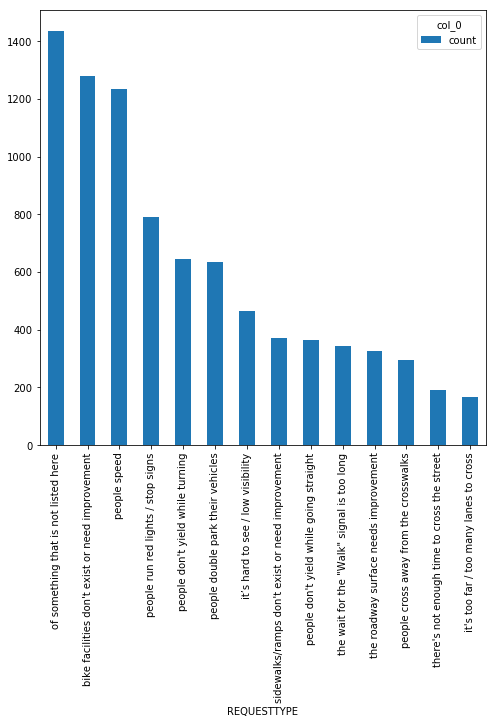

In [11]:
label_type_table = pd.crosstab(index = data['REQUESTTYPE'], columns="count")
label_type_table = label_type_table.sort_values(by = 'count', ascending = False)
label_type_table.plot(kind="bar",figsize=(8,8))

In [12]:
X = data[data['COMMENTS'].isnull() == False]['COMMENTS']
y = data[data['COMMENTS'].isnull() == False]['REQUESTTYPE']

# Task2 - Model 1 [10 points]

Run a baseline multi-class classification model using a bag-of-word approach, report macro f1-score (should be above .5) and visualize the confusion matrix. Can you interpret the mistakes made by the model? 

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [22]:
def unigram(X, X_train, X_test): 
    from sklearn.multiclass import OneVsRestClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.metrics import f1_score
    vectorizer = CountVectorizer(min_df=1, stop_words='english').fit(X)
    unigram_train = vectorizer.transform(X_train)
    unigram_test = vectorizer.transform(X_test)
    y_pred = OneVsRestClassifier(LogisticRegression()).fit(unigram_train, y_train).predict(unigram_test)
    f1score = f1_score(y_test, y_pred, average='macro') 
    return f1score,y_pred

In [29]:
def get_confusion_matrix(y_test, y_pred):
    from sklearn.metrics import confusion_matrix
    class_names = list(y_test.unique())
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    return cnf_matrix,class_names

In [30]:
f1score_unigram, y_pred = unigram(X, X_train, X_test)

In [32]:
cnf_matrix,class_names = get_confusion_matrix(y_test, y_pred)

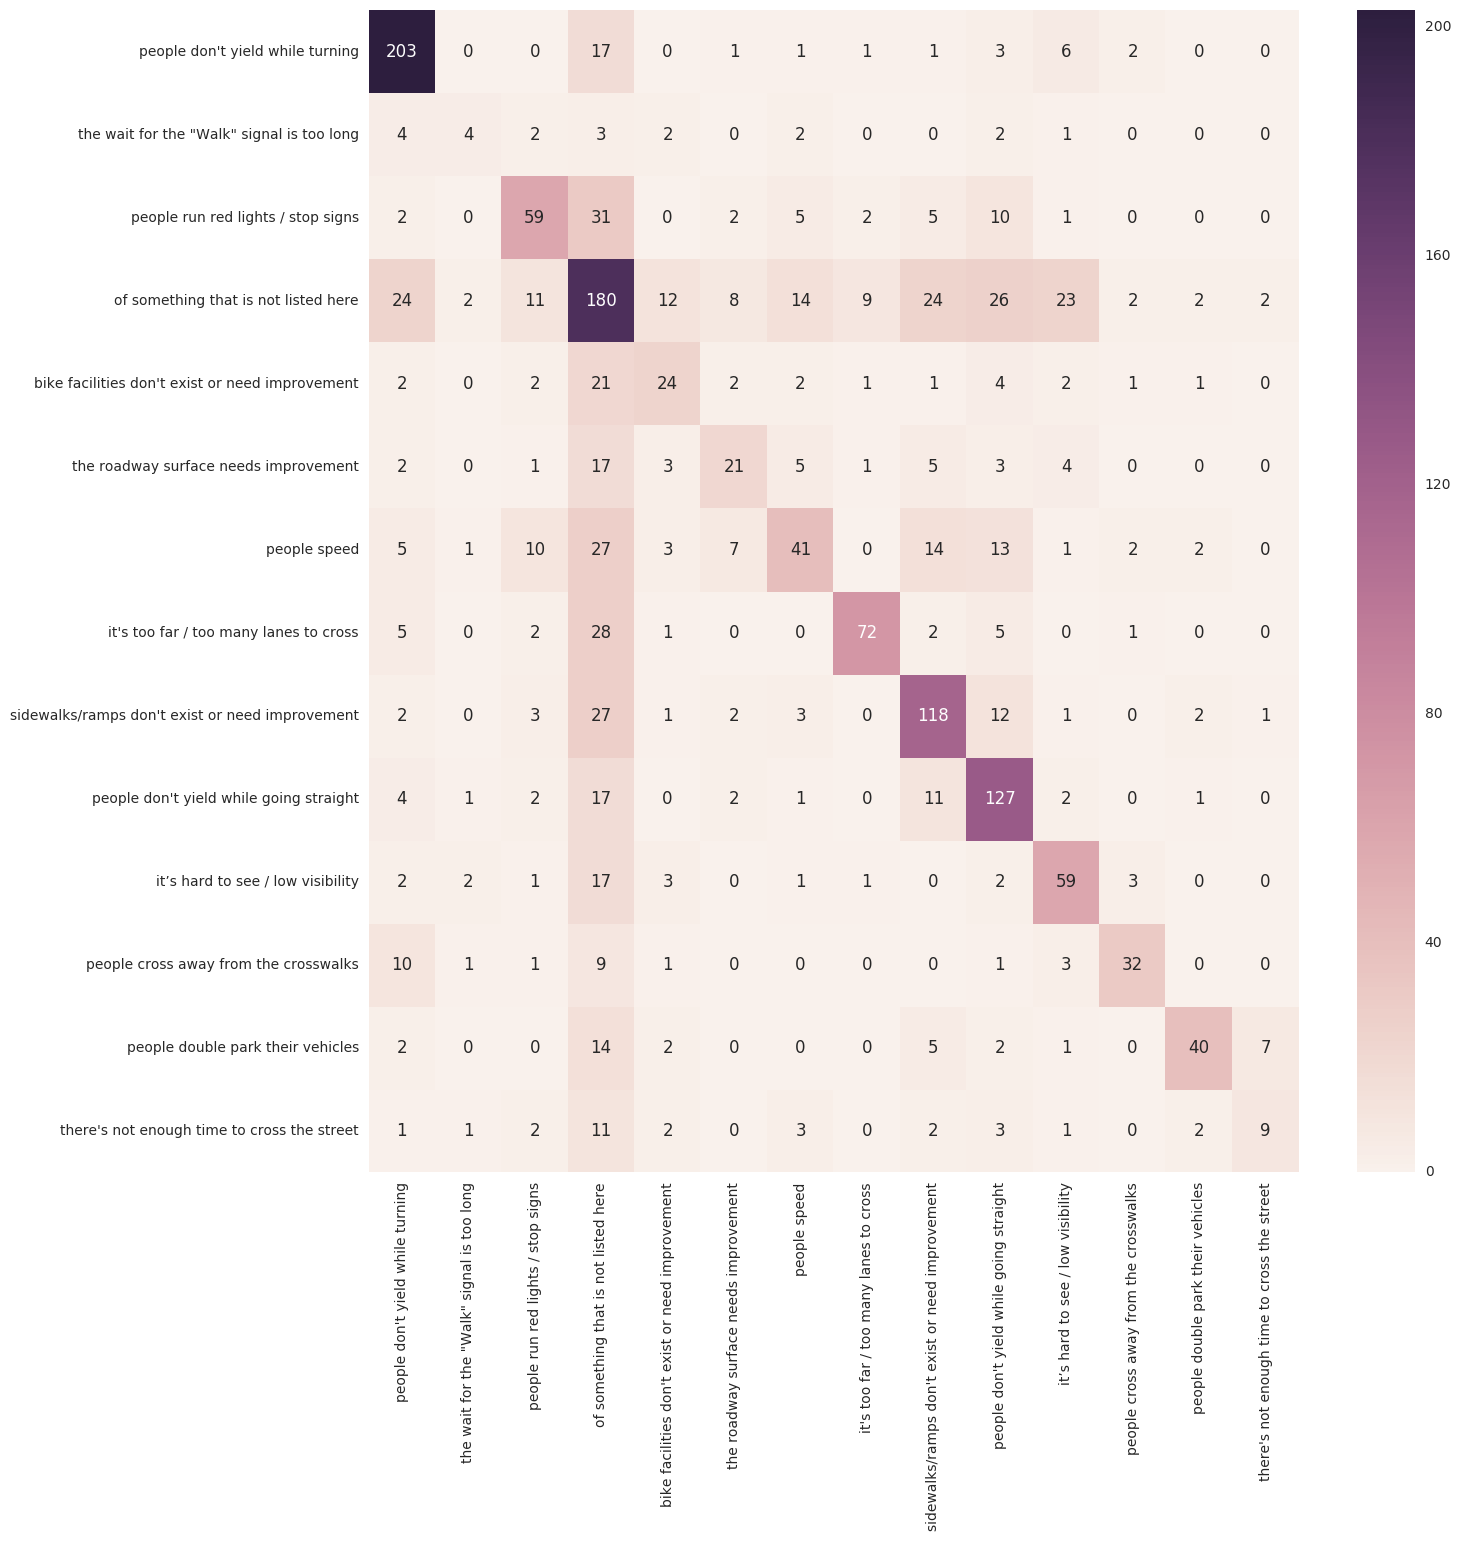

In [33]:
import seaborn as sn
df_cm = pd.DataFrame(cnf_matrix, index = [i for i in class_names],
                  columns = [i for i in class_names])
plt.figure(figsize = (15,15))
sn.heatmap(df_cm, fmt="d", annot=True)

* `Of something that is not listed` here is the most mislabeled class , which makes sense, since people's comments may be ambiguous. I am not sure.

* `Of something that is not listed` is also the most frequent label for the classes which are misclassfied.

# Task3 - Model 2 [30 points]

Improve the model using more complex text features, including n-grams, character n-grams and possibly domain-specific features.

### Bi-grams

In [40]:
def bigram(X, X_train, X_test):
    from sklearn.multiclass import OneVsRestClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.metrics import f1_score
    bigram_vectorizer = CountVectorizer(ngram_range=(1, 2), token_pattern=r'\b\w+\b', min_df=1).fit(X)
    bigram_train = bigram_vectorizer.transform(X_train)
    bigram_test = bigram_vectorizer.transform(X_test)
    y_pred = OneVsRestClassifier(LogisticRegression()).fit(bigram_train, y_train).predict(bigram_test)
    f1score = f1_score(y_test, y_pred, average='macro') 
    return f1score,y_pred

In [42]:
f1score_bigram, y_pred = bigram(X, X_train, X_test)

In [46]:
f1score_bigram

0.50787701720965928

### Character Bi-grams

In [43]:
# Add your code for task 3 here. You may use multiple cells. 
def charbigram(X, X_train, X_test):
    from sklearn.multiclass import OneVsRestClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.metrics import f1_score
    bigram_vectorizer = CountVectorizer(analyzer='char_wb',ngram_range=(1, 2), token_pattern=r'\b\w+\b', min_df=1).fit(X)
    bigram_train = bigram_vectorizer.transform(X_train)
    bigram_test = bigram_vectorizer.transform(X_test)
    y_pred = OneVsRestClassifier(LogisticRegression()).fit(bigram_train, y_train).predict(bigram_test)
    f1score = f1_score(y_test, y_pred, average='macro')
    return f1score,y_pred

In [47]:
f1score_charbigram, y_pred = charbigram(X, X_train, X_test)

In [48]:
f1score_charbigram

0.50787701720965928

### 5-grams

In [65]:
def fivegram(X, X_train, X_test):
    from sklearn.multiclass import OneVsRestClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.metrics import f1_score
    fivegram_vectorizer = CountVectorizer(ngram_range=(1, 5), min_df=1).fit(X)
    fivegram_train = fivegram_vectorizer.transform(X_train)
    fivegram_test = fivegram_vectorizer.transform(X_test)
    multiclf = OneVsRestClassifier(LogisticRegression()).fit(fivegram_train, y_train)
    y_pred = multiclf.predict(fivegram_test)
    f1score = f1_score(y_test, y_pred, average='macro') 
    return f1score,y_pred,fivegram_vectorizer,multiclf

In [60]:
f1score_fivegram, y_pred, fivegram_vectorizer,multiclf = fivegram(X, X_train, X_test)

In [75]:
f1score_fivegram

0.5706654901993562

### Character 5-grams

In [73]:
def charfivegram(X, X_train, X_test): 
    from sklearn.multiclass import OneVsRestClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.linear_model import LogisticRegressionCV
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.metrics import f1_score
    fivegram_vectorizer = CountVectorizer(analyzer='char_wb',ngram_range=(1, 5), min_df=1).fit(X)
    fivegram_train = fivegram_vectorizer.transform(X_train)
    fivegram_test = fivegram_vectorizer.transform(X_test)
    multiclf = OneVsRestClassifier(LogisticRegression()).fit(fivegram_train, y_train)
    y_pred = multiclf.predict(fivegram_test)
    f1score = f1_score(y_test, y_pred, average='macro') 
    return f1score,y_pred

In [74]:
f1score_charfivegram, y_pred = charfivegram(X, X_train, X_test)

/Users/chenchaozang/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [76]:
f1score_charfivegram

0.52587753228302714

# Task4 - Visualize Results [10 points]

Visualize results of the tuned model (classification results, confusion matrix, important features, example mistakes).

In [66]:
f1score_fivegram, y_pred, fivegram_vectorizer,multiclf = fivegram(X, X_train, X_test)

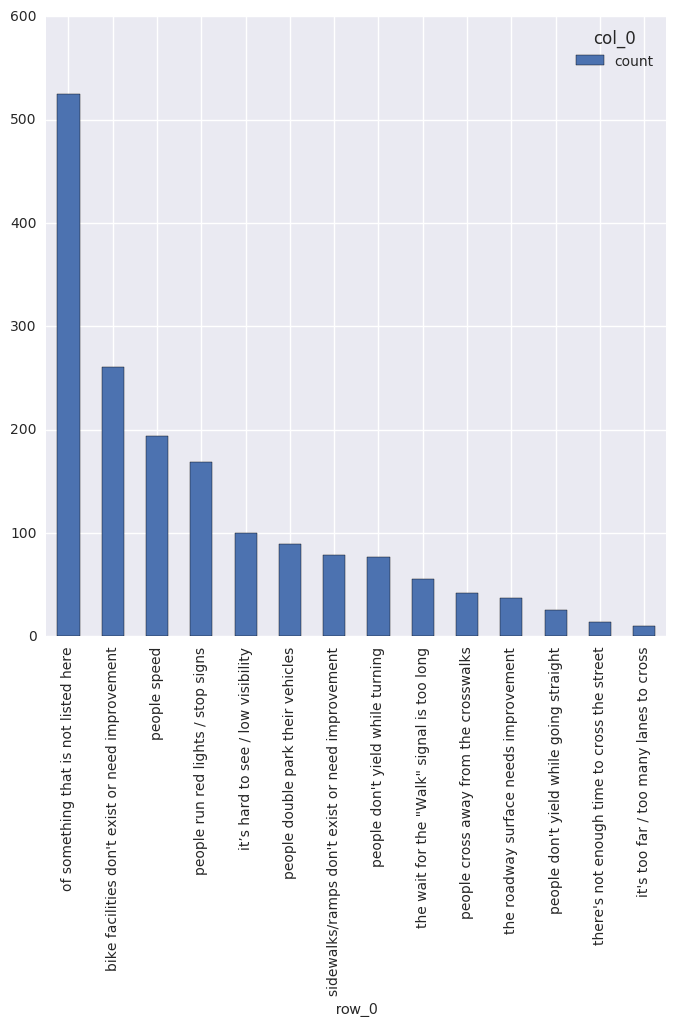

In [67]:
# Classification Result
label_type_table = pd.crosstab(index = y_pred, columns="count")
label_type_table = label_type_table.sort_values(by = 'count', ascending = False)
label_type_table.plot(kind="bar",figsize=(8,8))

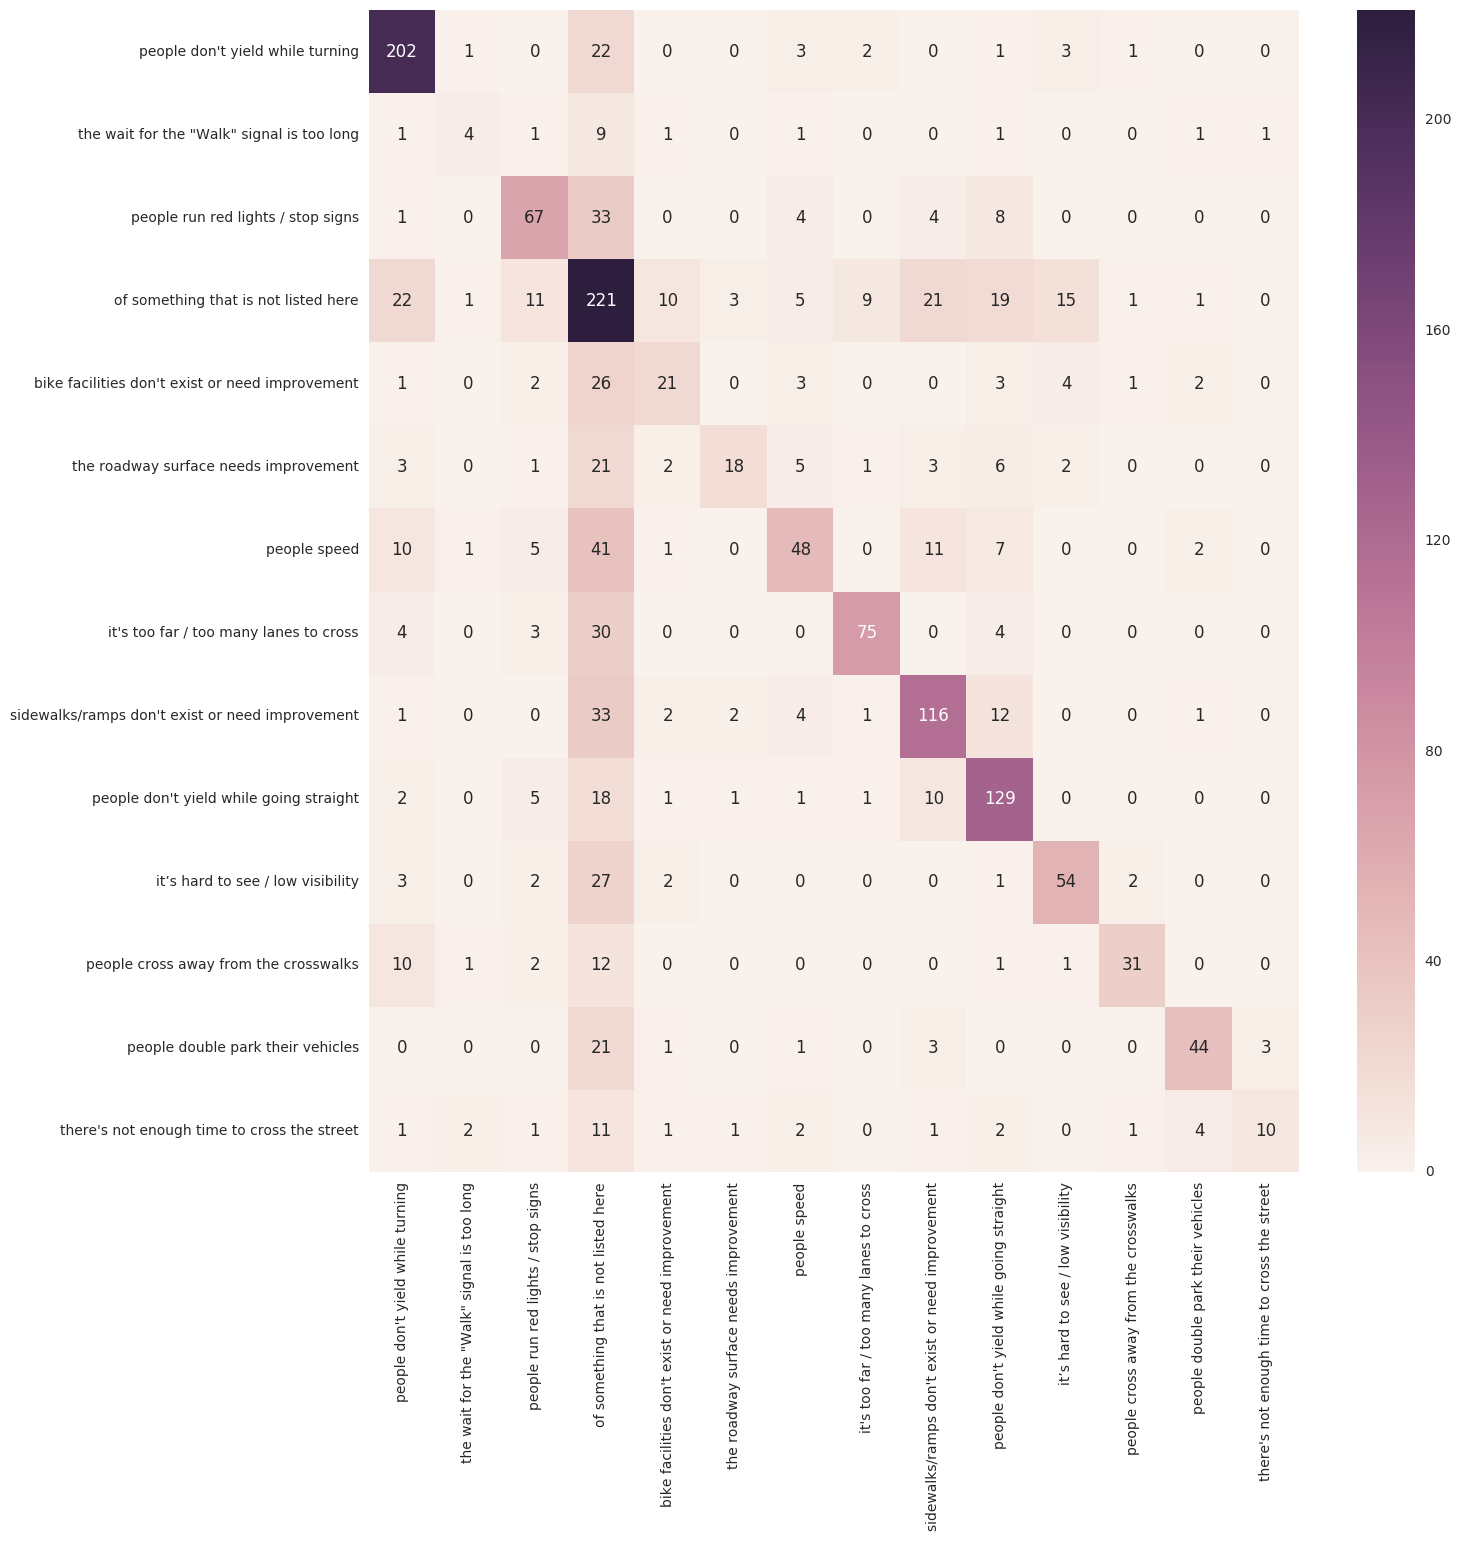

In [68]:
# Confusion Matrix
cnf_matrix,class_names = get_confusion_matrix(y_test, y_pred)
import seaborn as sn
df_cm = pd.DataFrame(cnf_matrix, index = [i for i in class_names],
                  columns = [i for i in class_names])
plt.figure(figsize = (15,15))
sn.heatmap(df_cm, fmt="d", annot=True)

In [69]:
# Plot Important Features
def plot_important_features(coef, feature_names, top_n=20, ax=None):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(coef)
    low = inds[:top_n]
    high = inds[-top_n:]
    important = np.hstack([low, high])
    myrange = range(len(important))

    ax.bar(myrange, coef[important])
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[important], rotation=60, ha="right")

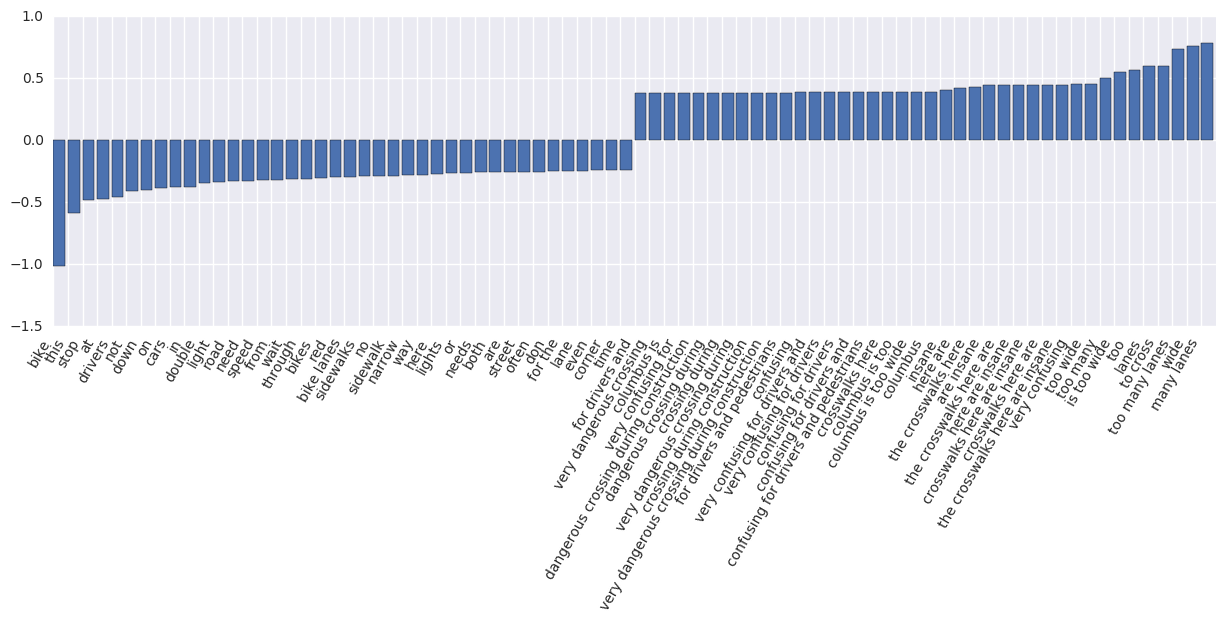

In [70]:
feature_names = fivegram_vectorizer.get_feature_names()
plt.figure(figsize=(15, 4))
plot_important_features(multiclf.estimators_[1].coef_.ravel(), np.array(feature_names), top_n=40)

# Task5 - Clustering [10 points]

Apply LDA, NMF and K-Means to the whole dataset. Can you find clusters or topics that match well with some of the ground truth labels? Use ARI to compare the methods and visualize topics and clusters.

### Bag of Word to the Whole dataset

In [77]:
# Add your code for task 5 here. You may use multiple cells. 
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features=10000, max_df=.15,stop_words='english',lowercase=True)
X_tokened = vect.fit_transform(X)

In [70]:
X_tokened.shape

(6706, 6176)

### LDA

In [14]:
#Train the model
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_topics=10, learning_method="batch", max_iter=20, random_state=0)
#X_lda is document by topics
X_lda = lda.fit_transform(X_tokened)

In [71]:
# Print out the 10 topics
import mglearn
sorting=np.argsort(lda.components_,axis=1)[:,::-1]
feature_names=np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                            sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
path          way           need          lane          speed         
bikes         st            don           left          parking       
sidewalk      drive         facilities    turn          lane          
low           needs         improvement   right         park          
use           wrong         exist         straight      road          
park          fast          sidewalks     lanes         double        
visibility    roadway       ramps         turning       dangerous     
hour          surface       protected     drivers       cut           
ramp          sidewalk      sharrows      intersection  zone          
curb          road          issue         going         need          


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
st  

In [18]:
from sklearn.metrics import adjusted_rand_score
#Return each document's most probable topic
document_topics=np.argmax(X_lda,axis=1)
#Calculate ari
ari_lda = adjusted_rand_score(y, document_topics)

In [96]:
# See topic 0's first 10 complains
topic0=np.argsort(X_lda[:,0])[::-1]
topic0_index=[i for i in topic0[:10]]
X.iloc[topic0_index]

389     the brick sidewalk from The Atlantic Beer Gard...
3455    Scaffolding along the Emerson College sidewalk...
4383    The blocks between Copley Sq. (or really the b...
3960    Lamartine should be closed to car traffic. Mov...
8158    Cars speed from Beech to Metropolitan, motorcy...
5547    This section of South Street is curvy and narr...
3611    The sidewalk has a small mouth that is flush w...
7260    The entire Dudley Street desperately NEEDS to ...
6327    There are homeless issues on Bromfield Street....
6937    There is no way to get back from Copley to the...
Name: COMMENTS, dtype: object

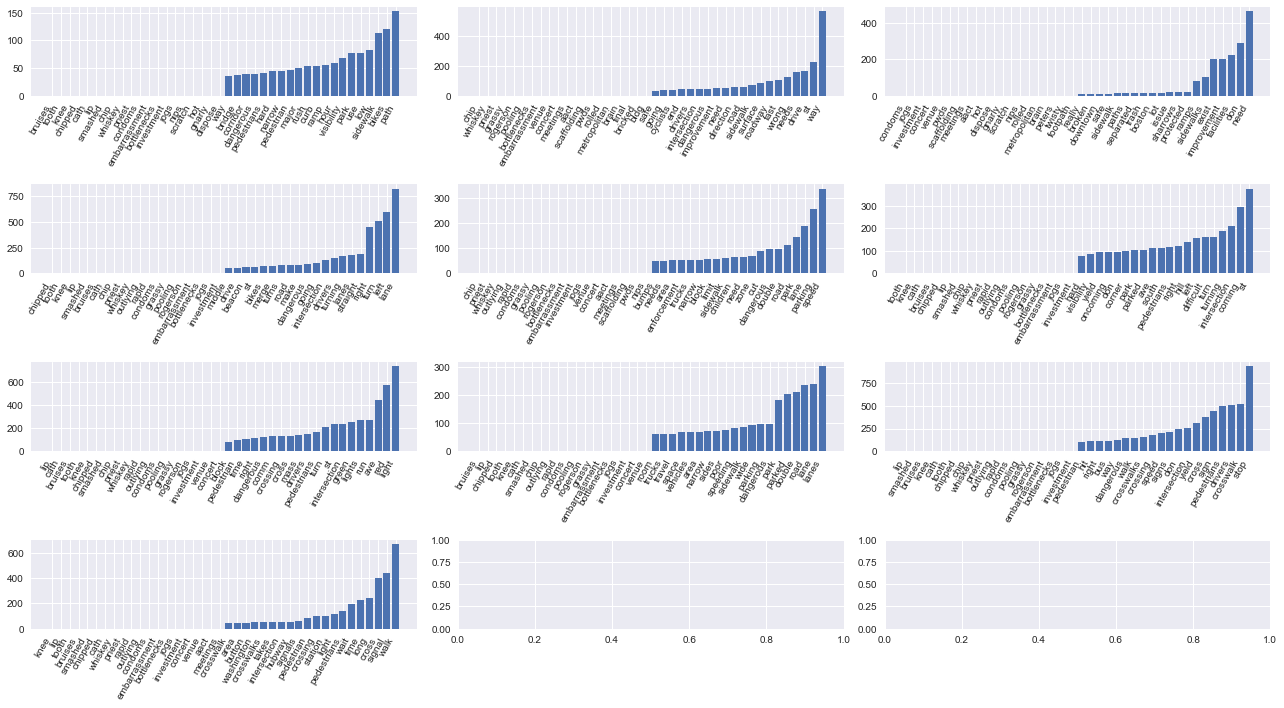

In [97]:
feature_names = np.array(vect.get_feature_names())
n_components = 10
fig, axes = plt.subplots(n_components // 3 + 1, 3, figsize=(18, 10))
for ax, coef in zip(axes.ravel(), lda.components_):
    plot_important_features(coef, feature_names, top_n=20, ax=ax)   
plt.tight_layout()

### NMF

In [15]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X_tokened)
nmf10 = NMF(n_components=10, verbose=10, tol=0.001)
X_nmf10 = nmf10.fit_transform(X_scaled)

violation: 1.0
violation: 0.34290186187512595
violation: 0.2256780687878477
violation: 0.13950591629133866
violation: 0.08890734324024185
violation: 0.06264718101849985
violation: 0.04740876111813288
violation: 0.038556370683836036
violation: 0.032765273209793215
violation: 0.028305294720061092
violation: 0.024617773214726985
violation: 0.02134382148318504
violation: 0.01873416103113271
violation: 0.016481039355689762
violation: 0.014489509527785173
violation: 0.012839495329859318
violation: 0.01146593405413107
violation: 0.01024984834194348
violation: 0.009203215969481345
violation: 0.008331642030444338
violation: 0.007573675068901918
violation: 0.006908516366047612
violation: 0.006331614847822053
violation: 0.00580438084665772
violation: 0.005331096757065087
violation: 0.0049275186598096935
violation: 0.004571203779693612
violation: 0.004260188239499975
violation: 0.003966785585828849
violation: 0.003694089620282088
violation: 0.003440230995799136
violation: 0.003166642945141096
viol

In [102]:
nmf10_pred=np.argmax(X_nmf10,axis=1)
ari_nmf10 = adjusted_rand_score(y, nmf10_pred)

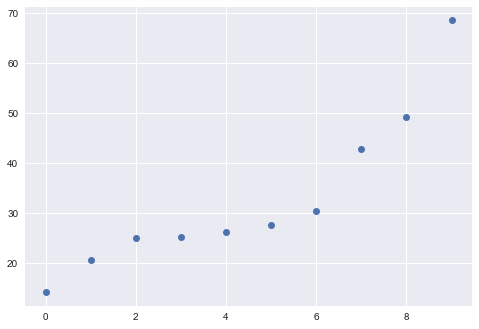

In [103]:
plt.plot(np.sort(nmf10.components_.sum(axis=1)), "o")

In [104]:
def print_topics(topics, feature_names, components, topics_per_chunk=6,
                 n_words=20):
    sorting = np.argsort(components, axis=1)[:, ::-1]
    for i in range(0, len(topics), topics_per_chunk):
        # for each chunk:
        these_topics = topics[i: i + topics_per_chunk]
        # maybe we have less than topics_per_chunk left
        len_this_chunk = len(these_topics)
        # print topic headers
        print(("topic {:<8}" * len_this_chunk).format(*these_topics))
        print(("-------- {0:<5}" * len_this_chunk).format(""))
        # print top n_words frequent words
        for i in range(n_words):
            try:
                print(("{:<14}" * len_this_chunk).format(
                    *feature_names[sorting[these_topics, i]]))
            except:
                pass
        print("\n")

In [116]:
sorting.shape

(10, 6176)

In [119]:
large_comp_inds = np.argsort(X_nmf10.mean(axis=0))[-20:][::-1]
print_topics(large_comp_inds, feature_names, nmf10.components_)

topic 2       topic 5       topic 7       topic 9       topic 3       topic 4       
--------      --------      --------      --------      --------      --------      
lane          yield         light         intersection  turning       dangerous     
double        pedestrians   seen          confusing     right         situation     
lanes         don           red           stop          left          makes         
park          drivers       run           ave           turn          extremely     
road          stop          hit           sign          difficult     speed         
parking       crosswalk     green         block         coming        especially    
parked        sign          lights        difficult     lane          crossing      
make          crossing      ve            clear         ave           speeds        
right         fail          car           busy          green         blind         
ave           signs         turns         coming        straight 

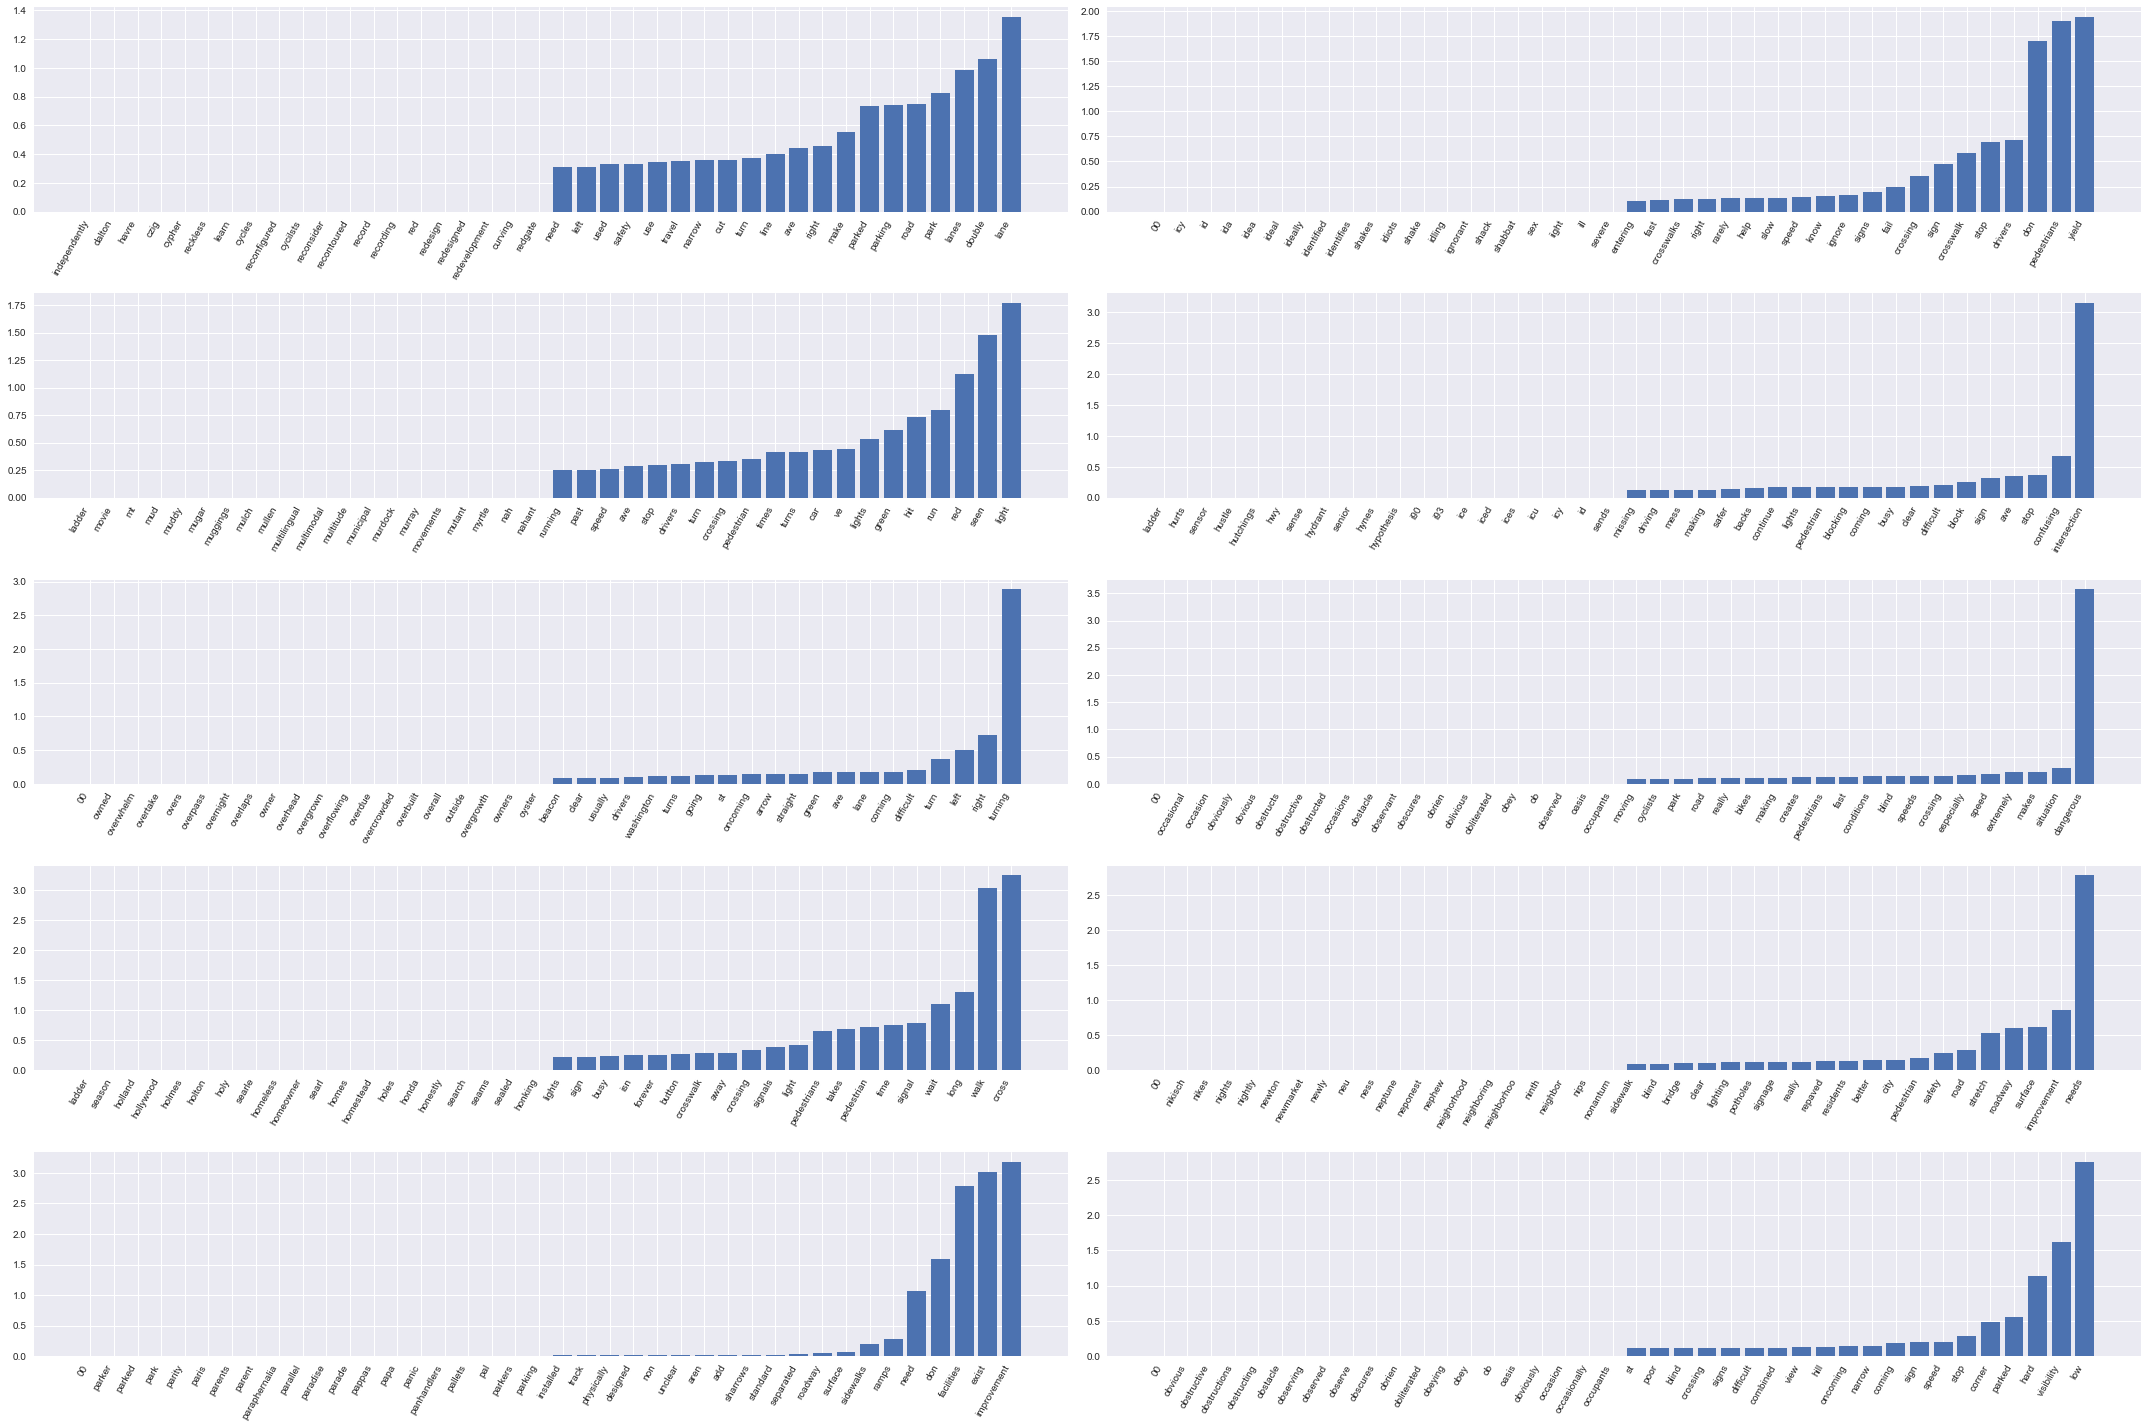

In [108]:
large_comp_inds = np.argsort(X_nmf10.mean(axis=0))[-20:][::-1]
n_components = 10
fig, axes = plt.subplots(n_components // 5+3 , 2, figsize=(30, 20))
for ax, coef in zip(axes.ravel(), nmf10.components_[large_comp_inds, :]):
    plot_important_features(coef, feature_names, top_n=20, ax=ax)
    
plt.tight_layout()

### K-Means

In [16]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=10, random_state=0)
km.fit(X_tokened)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [132]:
kmlabels=km.labels_
km_air = adjusted_rand_score(y, kmlabels)

### Use ARI to compare the methods and visualize topics and clusters

In [72]:
# from sklearn.feature_extraction.text import TfidfTransformer

# X_scaled = TfidfTransformer().fit_transform(X_tokened)
# aris_km, aris_lda, aris_nmf = [], [], []
# for i in range(1, 17):
#     km = KMeans(n_clusters=i).fit(X_tokened)
#     ari_km = adjusted_rand_score(y, km.labels_)
#     aris_km.append(ari_km)
    
#     lda = LatentDirichletAllocation(n_topics=i, learning_method="batch", max_iter=20, random_state=0)
#     X_lda=lda.fit_transform(X_tokened)
#     document_topics=np.argmax(X_lda,axis=1)
#     ari_lda = adjusted_rand_score(y, document_topics)
#     aris_lda.append(ari_lda)

    
#     nmf = NMF(n_components=i, verbose=10, tol=0.001)
#     X_nmf = nmf.fit_transform(X_scaled)
#     nmf_pred=np.argmax(X_nmf,axis=1)
#     ari_nmf = adjusted_rand_score(y, nmf_pred)
#     aris_nmf.append(ari_nmf)

<function matplotlib.pyplot.show>

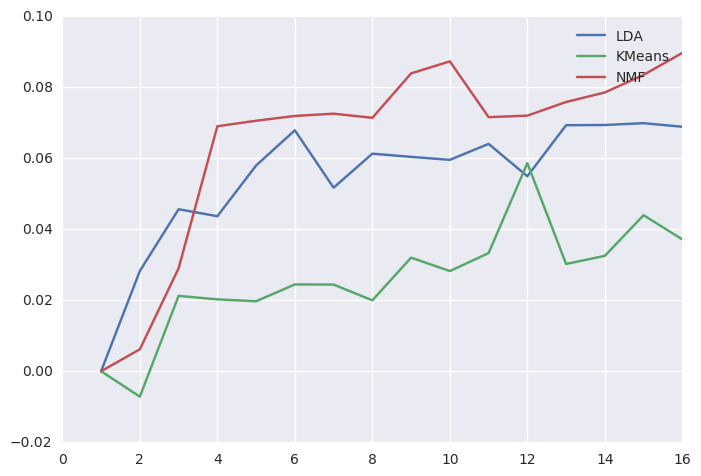

In [71]:
# plt.plot(range(1,17),aris_lda, label="LDA")
# plt.plot(range(1,17),aris_km, label="KMeans")
# plt.plot(range(1,17),aris_nmf, label="NMF")
# plt.legend()
# plt.show

# Task6 - Model 3 [30 points]

Improve the class definition for REQUESTTYPE by using the results of the clustering and results of the previous classification model. Re-assign labels using either the results of clustering or using keywords that you found during data exploration. The labels must be semantically meaningful.
The data has a large “other” category. Apply the topic modeling and clustering techniques to this subset of the data to find possible splits of this class.
Report accuracy using macro average f1 score (should be above .53) 


### Approach 
#### Step 1: Subset the 'of something that is not listed etc' observations as X_others and remaining as X_fit
#### Step 2: Fit LDA on X_fit, transform on X_others, transform on X_fit
#### Step 3: Assign the new lable with semantic meaning
#### Step 4: Retrain model on mult-classification and report F1 score
#### FInally we pick 5 topics and the Macro F1 score is around 0.8, it may vary due to train_test_split

In [78]:
X_others = X[y == 'of something that is not listed here']
X_fit = X[y != 'of something that is not listed here']
vfit = vect.fit(X_fit)
X_fit = vfit.transform(X_fit)
X_others = vfit.transform(X_others)

In [79]:
# LDA, try 13 topics because there are 13 type of complains in the original data
# Fit model on the 13 classes without others, then transform on the others subset
lda = LatentDirichletAllocation(n_topics=13, learning_method="batch", max_iter=20, random_state=0)
lda.fit(X_fit)
result = lda.transform(X_others)
result = np.argmax(result,axis=1)

In [83]:
import mglearn
sorting=np.argsort(lda.components_,axis=1)[:,::-1]
feature_names=np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=range(13), feature_names=feature_names,
                            sorting=sorting, topics_per_chunk=5, n_words=20)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
light         stop          hard          speed         narrow        
pedestrians   sign          visibility    crosswalk     sidewalk      
red           bus           coming        st            road          
drivers       signs         low           way           rush          
yield         crossing      parked        drivers       hour          
stop          crosswalks    poor          dangerous     lane          
right         crosswalk     dangerous     area          especially    
turn          stops         oncoming      cross         night         
run           intersection  spot          road          curb          
crosswalk     school        parking       pedestrians   sidewalks     
turning       way           blind         cut           unsafe        
sign          speeding      corner        school        needs         
don   

#### Check macro f1 score.

In [84]:
result_= lda.transform(X_fit)
result_= np.argmax(result_,axis=1)

In [92]:
y_new=y.copy()
y_new[y_new !='of something that is not listed here'] = result_
y_new[y_new=='of something that is not listed here'] = result

In [86]:
X_train,X_test,y_train,y_test=train_test_split(X_tokened,y_new,stratify=y)

In [90]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
y_pred_new = OneVsRestClassifier(LogisticRegression()).fit(X_train, y_train.tolist()).predict(X_test)
f1_score(y_test.tolist(), y_pred_new, average='macro') 

0.62877675609393568

### Assign semantic label to topics

In [94]:
y_new[y_new==0]= 'Lights Problem'
y_new[y_new==1]= 'Traffic Signs Problem'
y_new[y_new==2]= 'Visibility Problem'
y_new[y_new==3]= 'Speed Problem'
y_new[y_new==4]= 'Sidewalk Problem'
y_new[y_new==5]= 'Station Parking'
y_new[y_new==6]= 'Too Many Lines'
y_new[y_new==7]= 'Sidewalk/Facility Improvement'
y_new[y_new==8]= 'Double Parking Problem'
y_new[y_new==9]= 'Needs Turning Left Line'
y_new[y_new==10]= 'Drive Too Fast'
y_new[y_new==11]= 'Intersection Turning Problem'
y_new[y_new==12]= 'Signal Too Long'

#### However, we saw lots of topics have overlapping, so we decide to decrease the number of topics and retrain the model, we decide to use 5 topics

In [95]:
lda = LatentDirichletAllocation(n_topics=5, learning_method="batch", max_iter=20, random_state=0)
lda.fit(X_fit)
result=lda.transform(X_others)
result=np.argmax(result,axis=1)
sorting=np.argsort(lda.components_,axis=1)[:,::-1]
feature_names=np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=range(5), feature_names=feature_names,
                            sorting=sorting, topics_per_chunk=5, n_words=20)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
light         lane          path          speed         need          
stop          double        visibility    cross         don           
pedestrians   park          road          way           improvement   
drivers       lanes         dangerous     st            exist         
turn          walk          low           lanes         facilities    
intersection  parking       hard          crosswalk     lane          
right         signal        parking       dangerous     needs         
st            long          cyclists      road          sidewalks     
red           parked        way           sidewalk      roadway       
cross         road          area          fast          surface       
turning       wait          ave           needs         ramps         
left          bus           lanes         station       road          
sign  

In [96]:
result_=lda.transform(X_fit)
result_=np.argmax(result_,axis=1)
y_new=y.copy()
y_new[y_new !='of something that is not listed here'] = result_
y_new[y_new=='of something that is not listed here'] = result

In [103]:
X_train,X_test,y_train,y_test=train_test_split(X_tokened,y_new,stratify=y)
y_pred_new = OneVsRestClassifier(LogisticRegression()).fit(X_train, y_train.tolist()).predict(X_test)
f1_score(y_test.tolist(), y_pred_new, average='macro') 

0.77085909189849455

### Try other classifiers
Those classifers don't perform very well, so we decide to keep the LogisticRegression Model

In [98]:
# from sklearn.ensemble import RandomForestClassifier
# y_pred_new = OneVsRestClassifier(LinearSVC()).fit(X_train, y_train.tolist()).predict(X_test)
# f1_score(y_test.tolist(), y_pred_new, average='macro') 
# y_pred_new = OneVsRestClassifier(RandomForestClassifier()).fit(X_train, y_train.tolist()).predict(X_test)
# f1_score(y_test.tolist(), y_pred_new, average='macro') 

### Assign new labels

In [99]:
# y_new=y.copy()
y_new[y_new==0]= 'Lights Problem'
y_new[y_new==1]= 'Parking Problem'
y_new[y_new==2]= 'Visibility Problem'
y_new[y_new==3]= 'Speed Problem'
y_new[y_new==4]= 'Facilities Problem'

# Extra Credit [Up to +20 points]

In [15]:
# from gensim import models
# text_train, y_train = X, y
# text_train_sub, text_val, y_train_sub, y_val = train_test_split(
#     text_train, y_train, stratify=y_train, random_state=0)
# w=models.KeyedVectors.load_word2vec_format("/Users/van/Desktop/homework-iv-zangcc0474/GoogleNews-vectors-negative300.bin",binary=True)

In [18]:
# vect_w2v = CountVectorizer(vocabulary=w.index2word)
# vect_w2v.fit(text_train_sub)
# docs = vect_w2v.inverse_transform(vect_w2v.transform(text_train_sub))
# X_train = np.vstack([np.mean(w[doc], axis=0) for doc in docs])
# docs_val = vect_w2v.inverse_transform(vect_w2v.transform(text_val))
# X_val = np.vstack([np.mean(w[doc], axis=0) for doc in docs_val])

In [22]:
# lr_w2v = LogisticRegression(C=100).fit(X_train, y_train_sub)
# lr_w2v.score(X_train, y_train_sub)

0.72539272221117523

In [23]:
# lr_w2v.score(X_val, y_val)

0.59630292188431722

Use a word embedding representation like word2vec for step 3 and or step 6. 

In [ ]:
def test_score():
    assert f1_score(y_test.tolist(), y_pred_new, average='macro') > 0.75